# Use decision trees to prepare a model on fraud data 
# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
fraudcheck=pd.read_csv("C:\\Users\\Anjana\\Desktop\\DS Assignments\\Decision Tree\\Fraud_check.csv")

In [4]:
fraudcheck

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
fraudcheck.shape

(600, 6)

In [6]:
fraudcheck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
fraudcheck.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
fraudcheck.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [9]:
fraudcheck.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [10]:
fraudcheck.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

<AxesSubplot:xlabel='Undergrad', ylabel='count'>

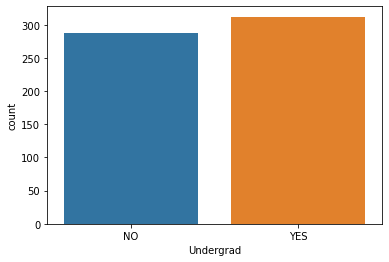

In [11]:
sns.countplot('Undergrad',data=fraudcheck)

<AxesSubplot:xlabel='Marital.Status', ylabel='count'>

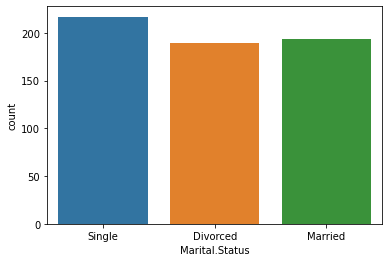

In [12]:
sns.countplot('Marital.Status',data=fraudcheck)

<AxesSubplot:xlabel='Urban', ylabel='count'>

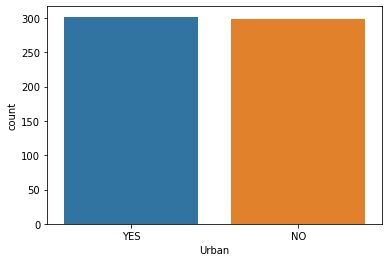

In [13]:
sns.countplot('Urban',data=fraudcheck)

<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

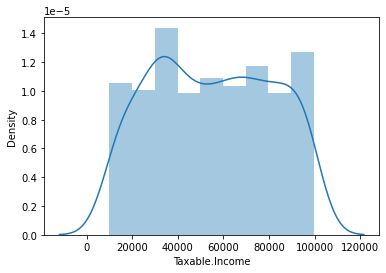

In [14]:
sns.distplot(fraudcheck['Taxable.Income'])


In [15]:
fraudcheck[fraudcheck['Taxable.Income']<=30000]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
10,NO,Single,29732,102602,19,YES
12,NO,Divorced,11794,148033,14,YES
16,YES,Divorced,24987,34551,29,NO
19,NO,Single,10987,126953,30,YES
21,YES,Divorced,14310,29106,7,YES
...,...,...,...,...,...,...
544,NO,Single,29916,133877,21,YES
557,YES,Married,12810,157421,10,NO
567,YES,Single,16316,129912,30,NO
575,NO,Divorced,10735,95975,13,YES


In [16]:
fraudcheck[fraudcheck['Taxable.Income']>30000]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [17]:
fraudcheck['tax_category']=' '

In [18]:
fraudcheck.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'tax_category'],
      dtype='object')

In [19]:
fraudcheck.loc[fraudcheck['Taxable.Income']>30000,'tax_category']='Good'

In [20]:
fraudcheck.loc[fraudcheck['Taxable.Income']<=30000,'tax_category']='Risky'

In [21]:
fraudcheck

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [22]:
fraudcheck.tax_category.value_counts()

Good     476
Risky    124
Name: tax_category, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
label=LabelEncoder()

In [25]:
fraudcheck['Undergrad']=label.fit_transform(fraudcheck['Undergrad'])
fraudcheck['Marital.Status']=label.fit_transform(fraudcheck['Marital.Status'])
fraudcheck['Urban']=label.fit_transform(fraudcheck['Urban'])
fraudcheck['tax_category']=label.fit_transform(fraudcheck['tax_category'])

In [26]:
fraudcheck.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_category
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [27]:
#train test split
from sklearn.model_selection import train_test_split

In [28]:
x=fraudcheck.drop(["Taxable.Income","tax_category"],axis=1)
y=fraudcheck[["tax_category"]]

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [30]:
x_train.shape,y_train.shape

((480, 5), (480, 1))

In [31]:
x_test.shape,y_test.shape

((120, 5), (120, 1))

In [32]:
#model building decisin tree
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt_model=DecisionTreeClassifier(random_state=4)

In [34]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=4)

In [35]:
y_train_pred=dt_model.predict(x_train)

In [36]:
y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [37]:
y_test_pred=dt_model.predict(x_test)

In [38]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [39]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score

In [40]:
confusion_matrix(y_test,y_test_pred)

array([[80, 17],
       [18,  5]], dtype=int64)

In [41]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        97
           1       0.23      0.22      0.22        23

    accuracy                           0.71       120
   macro avg       0.52      0.52      0.52       120
weighted avg       0.70      0.71      0.71       120



In [42]:
accuracy_score(y_train,y_train_pred)

1.0

In [43]:
accuracy_score(y_test,y_test_pred)

0.7083333333333334

In [44]:
from sklearn import tree

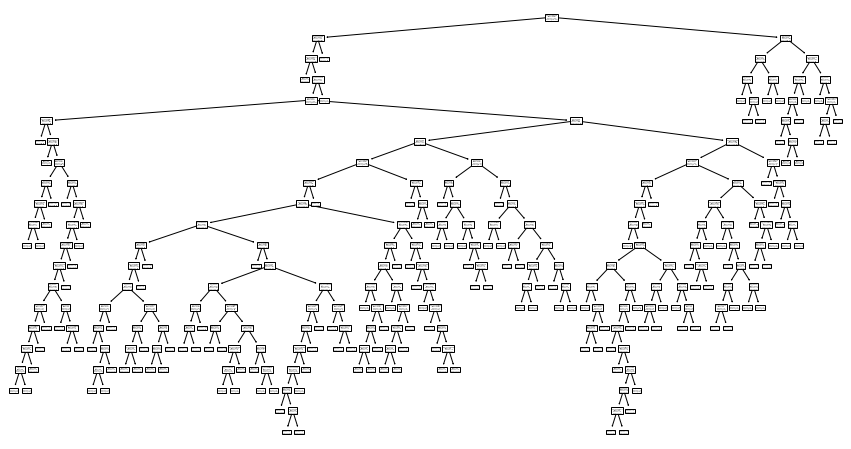

In [45]:
plt.figure(figsize=(15,8))
tree.plot_tree(dt_model)
plt.show()

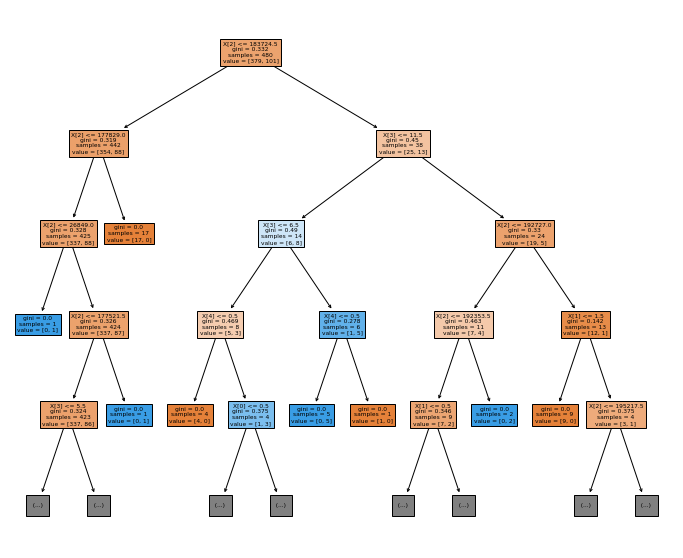

In [46]:
plt.figure(figsize=(12,10))
tree.plot_tree(dt_model,max_depth=4,filled=True)
plt.show()

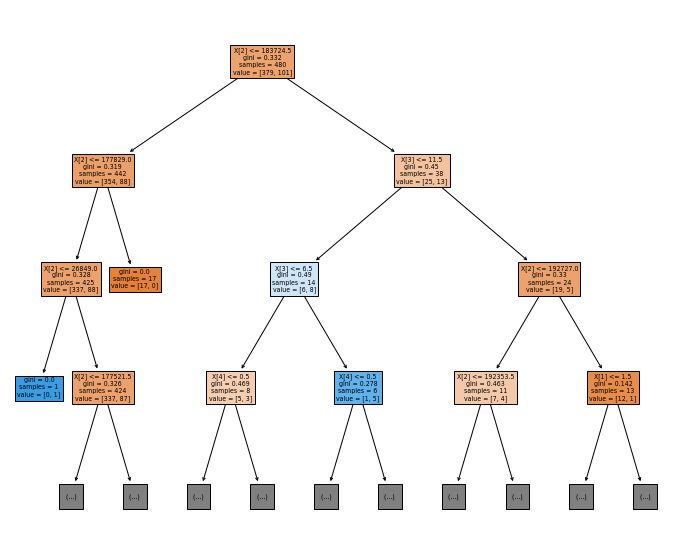

In [47]:
plt.figure(figsize=(12,10))
tree.plot_tree(dt_model,max_depth=3,filled=True)
plt.show()

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
grid_model=GridSearchCV(estimator=dt_model,param_grid={"criterion":["entropy","gini"], "max_depth":[2,3,4,5,6,7,8,9,10]})

In [50]:
grid_model.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=4),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [51]:
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'entropy', 'max_depth': 2}
0.7833333333333333


In [52]:
dt_model_cv=DecisionTreeClassifier(criterion="entropy",max_depth=2,random_state=1)

In [53]:
dt_model_cv

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

In [54]:
dt_model_cv.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

In [56]:
y_test_pred_cv=dt_model_cv.predict(x_test)

In [57]:
y_test_pred_cv

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
confusion_matrix(y_test,y_test_pred_cv)

array([[97,  0],
       [23,  0]], dtype=int64)

In [59]:
accuracy_score(y_test,y_test_pred_cv)

0.8083333333333333

In [60]:
print(classification_report(y_test,y_test_pred_cv))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        97
           1       0.00      0.00      0.00        23

    accuracy                           0.81       120
   macro avg       0.40      0.50      0.45       120
weighted avg       0.65      0.81      0.72       120



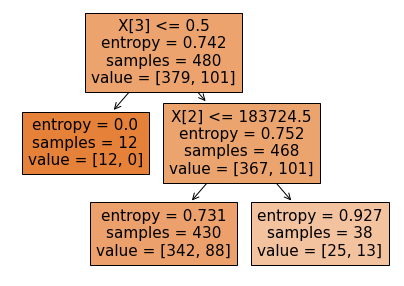

In [61]:
plt.figure(figsize=(7,5))
tree.plot_tree(dt_model_cv,filled=True)
plt.show()